In [1]:
from itertools import chain
from pathlib import Path

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay

from utils import preprocessing

In [2]:
# Define channels
columns = {
    "imu": {
        "wx": True,
        "wy": True,
        "wz": True,
        "ax": True,
        "ay": True,
        "az": True,
    },
    "pro": {
        "velL": True,
        "velR": True,
        "curL": True,
        "curR": True,
    },
}
summary = pd.DataFrame({"columns": pd.Series(columns)})

csv_dir = Path("norlab-data")

In [3]:
X_cols = [[k for k, v in ch.items() if v] for ch in columns.values()]
X_cols = list(chain.from_iterable(X_cols))

# Get recordings
data = preprocessing.get_recordings(csv_dir, summary)
merged = preprocessing.merge_upsample(data, summary, mode="last")

terrains = sorted(merged.terrain.unique())

X = merged[X_cols].copy()
y = merged.terrain.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

In [4]:
rf_clf = RandomForestClassifier(n_estimators=500, oob_score=True, n_jobs=25)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=500, n_jobs=25, oob_score=True)

In [5]:
y_pred = rf_clf.predict(X_test)
print(rf_clf.score(X_test, y_test))

0.9573148536384203


Text(0.5, 1.0, 'Random Forest')

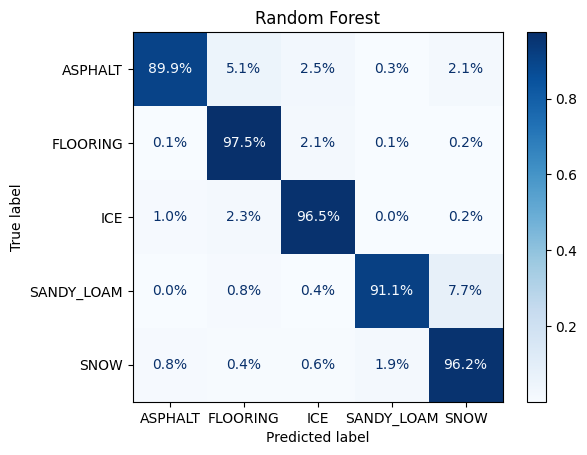

In [6]:
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    labels=terrains,
    display_labels=terrains,
    normalize='true',
    values_format=".1%",
    cmap="Blues",
)
disp.ax_.set_title("Random Forest")

In [7]:
mlp_clf = MLPClassifier(max_iter=750, verbose=True, learning_rate="adaptive")
mlp_clf.fit(X_train, y_train)


Iteration 1, loss = 0.69468534
Iteration 2, loss = 0.52495735
Iteration 3, loss = 0.48516293
Iteration 4, loss = 0.46529468
Iteration 5, loss = 0.45135946
Iteration 6, loss = 0.43957476
Iteration 7, loss = 0.42997009
Iteration 8, loss = 0.42250352
Iteration 9, loss = 0.41418622
Iteration 10, loss = 0.40531277
Iteration 11, loss = 0.39750095
Iteration 12, loss = 0.39112901
Iteration 13, loss = 0.38548068
Iteration 14, loss = 0.38094794
Iteration 15, loss = 0.37589515
Iteration 16, loss = 0.37210631
Iteration 17, loss = 0.36837345
Iteration 18, loss = 0.36592993
Iteration 19, loss = 0.36298458
Iteration 20, loss = 0.36063975
Iteration 21, loss = 0.35942712
Iteration 22, loss = 0.35742474
Iteration 23, loss = 0.35537523
Iteration 24, loss = 0.35391377
Iteration 25, loss = 0.35208067
Iteration 26, loss = 0.35166877
Iteration 27, loss = 0.34957067
Iteration 28, loss = 0.34895236
Iteration 29, loss = 0.34740578
Iteration 30, loss = 0.34618132
Iteration 31, loss = 0.34560140
Iteration 32, los

MLPClassifier(learning_rate='adaptive', max_iter=750, verbose=True)

In [8]:
y_pred = mlp_clf.predict(X_test)
print(mlp_clf.score(X_test, y_test))

0.8842838119899922


Text(0.5, 1.0, 'Multi Layer Perceptron')

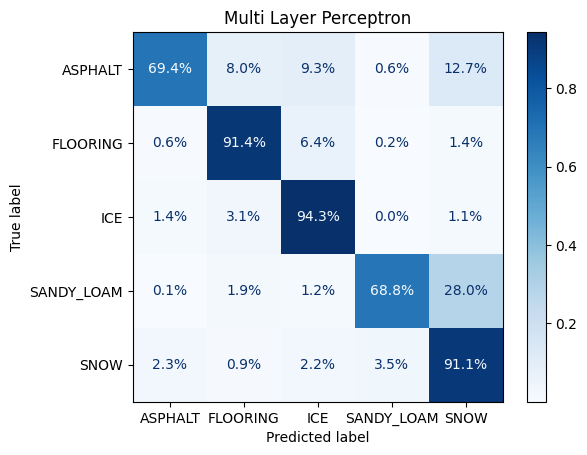

In [9]:
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    labels=terrains,
    display_labels=terrains,
    normalize='true',
    values_format=".1%",
    cmap="Blues",
)
disp.ax_.set_title("Multi Layer Perceptron")